In [32]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from random import seed
from random import randrange
from csv import reader
from math import sqrt

#svm
from sklearn import datasets
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#geotools
import geopy
import geocoder
import geopandas as gpd
from geopandas.tools import geocode
from geopy.geocoders import Nominatim

In [10]:
data = pd.read_csv("Motor_Vehicle_Crashes.csv")
print(data.dtypes)
print(data.shape)

C:\Users\jeffr\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [11]:
data = data[['BOROUGH','NUMTIME','LONGITUDE','LATITUDE','NUMBER OF PERSONS KILLED','NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS KILLED','NUMBER OF PEDESTRIANS INJURED']]
data['PERSONS_AFFECTED'] = data['NUMBER OF PERSONS KILLED'] + data['NUMBER OF PERSONS INJURED']
data['PEDESTRIANS_AFFECTED'] = data['NUMBER OF PEDESTRIANS KILLED'] + data['NUMBER OF PEDESTRIANS INJURED']
data.head(30)

,BOROUGH,NUMTIME,LONGITUDE,LATITUDE,NUMBER OF PERSONS KILLED,NUMBER OF PERSONS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF PEDESTRIANS INJURED,PERSONS_AFFECTED,PEDESTRIANS_AFFECTED
0,NaN,8.17,-73.905340,40.887352,0.0,0.0,0,0,0.0,0
1,NaN,13.52,-73.942620,40.664948,0.0,0.0,0,0,0.0,0
2,QUEENS,9.25,-73.870220,40.726185,0.0,0.0,0,0,0.0,0
3,BRONX,1.15,-73.891624,40.820984,0.0,0.0,0,0,0.0,0
4,NaN,18.00,NaN,NaN,0.0,0.0,0,0,0.0,0
5,NaN,13.00,-73.999640,40.753918,0.0,0.0,0,0,0.0,0
6,BROOKLYN,17.50,-73.946430,40.624382,0.0,0.0,0,0,0.0,0
7,QUEENS,8.00,-73.791720,40.679310,0.0,0.0,0,0,0.0,0
8,BROOKLYN,8.15,-73.899796,40.644226,0.0,0.0,0,0,0.0,0
9,NaN,19.33,-74.008210,40.742140,0.0,0.0,0,0,0.0,0


In [12]:
data = data.drop(['NUMBER OF PERSONS KILLED','NUMBER OF PERSONS INJURED','NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED'],axis=1)
data.head(30)

,BOROUGH,NUMTIME,LONGITUDE,LATITUDE,PERSONS_AFFECTED,PEDESTRIANS_AFFECTED
0,NaN,8.17,-73.905340,40.887352,0.0,0
1,NaN,13.52,-73.942620,40.664948,0.0,0
2,QUEENS,9.25,-73.870220,40.726185,0.0,0
3,BRONX,1.15,-73.891624,40.820984,0.0,0
4,NaN,18.00,NaN,NaN,0.0,0
5,NaN,13.00,-73.999640,40.753918,0.0,0
6,BROOKLYN,17.50,-73.946430,40.624382,0.0,0
7,QUEENS,8.00,-73.791720,40.679310,0.0,0
8,BROOKLYN,8.15,-73.899796,40.644226,0.0,0
9,NaN,19.33,-74.008210,40.742140,0.0,0


In [13]:
def borough(x):
    if x=="QUEENS":
        return 1
    if x=='BROOKLYN':
        return 2
    if x=='MANHATTAN':
        return 3
    if x=='BRONX':
        return 4
    if x=='STATEN ISLAND':
        return 5
data['BOROUGH'] = data['BOROUGH'].apply(borough)


In [14]:
data = data.dropna()
data = data[data.LONGITUDE !=0]
data['PERSONS_TF']=0
data['PERSONS_AFFECTED'].value_counts()

0.0     531223
1.0     100503
2.0      17298
3.0       5399
4.0       1957
5.0        792
6.0        309
7.0        130
8.0         67
9.0         21
10.0        18
11.0        10
12.0         6
19.0         4
13.0         4
17.0         3
18.0         2
20.0         2
14.0         2
16.0         2
22.0         1
28.0         1
15.0         1
Name: PERSONS_AFFECTED, dtype: int64

In [16]:
data.loc[data['PERSONS_AFFECTED'] > 0, 'PERSONS_TF']= 1
data.loc[data['PERSONS_AFFECTED'] == 0, 'PERSONS_TF']= 0
#for index,row in data.iterrows():
 #   if row['PERSONS_AFFECTED'] == 0:
  #      row['PERSONS_TF'] = 0
   # else:
#        row['PERSONS_TF'] = 1
data.head(20)

,BOROUGH,NUMTIME,LONGITUDE,LATITUDE,PERSONS_AFFECTED,PEDESTRIANS_AFFECTED,PERSONS_TF
2,1.0,9.25,-73.870220,40.726185,0.0,0,0
3,4.0,1.15,-73.891624,40.820984,0.0,0,0
6,2.0,17.50,-73.946430,40.624382,0.0,0,0
7,1.0,8.00,-73.791720,40.679310,0.0,0,0
8,2.0,8.15,-73.899796,40.644226,0.0,0,0
13,1.0,12.42,-73.740820,40.718754,1.0,0,1
14,4.0,14.50,-73.868164,40.847130,0.0,0,0
16,1.0,9.15,-73.740800,40.660965,0.0,0,0
17,2.0,14.58,-73.975700,40.678800,0.0,0,0
18,3.0,7.70,-73.957710,40.779495,0.0,0,0


KNN to predict person involved

KNN predict borough

calculate null_accuracy (guessing)

In [33]:
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# calculate the Euclidean distance between two vectors
def euclidean_distance(longitude,latitude):
    distance = 0.0
    for i in range(len(longitude)-1):
        distance += (longitude[i] - latitude[i])**2
    return sqrt(distance)
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row,train_row)
        distances.append((train_row,dist))
    distances.sort(key=lambda tup:tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction
def k_nearest_neighbors(train, test, num_neighbors):
    predictions = list()
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return(predictions)

def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
    train_set = list(folds)
    train_set.remove(fold)
    train_set = sum(train_set, [])
    test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

In [34]:
n_folds = 5
num_neighbors = 5
scores = evaluate_algorithm(data, k_nearest_neighbors, n_folds, num_neighbors)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

ValueError: empty range for randrange()

Expected 0, Got 0.


In [12]:
#predict borough
x = data.iloc[:,1:5]
y = data.iloc[:,0]
print(x)
print(y)
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

         NUMTIME  LONGITUDE   LATITUDE  PERSONS_AFFECTED
2           9.25 -73.870220  40.726185               0.0
3           1.15 -73.891624  40.820984               0.0
6          17.50 -73.946430  40.624382               0.0
7           8.00 -73.791720  40.679310               0.0
8           8.15 -73.899796  40.644226               0.0
...          ...        ...        ...               ...
1048568    14.18 -73.986363  40.740184               0.0
1048569    19.50 -73.942316  40.602685               1.0
1048571    11.50 -73.966369  40.602466               0.0
1048572    19.45 -73.860625  40.715488               0.0
1048573    17.25 -73.918164  40.628005               0.0

[658613 rows x 4 columns]
2          1.0
3          4.0
6          2.0
7          1.0
8          2.0
          ... 
1048568    3.0
1048569    2.0
1048571    2.0
1048572    1.0
1048573    2.0
Name: BOROUGH, Length: 658613, dtype: float64


In [ ]:
svc = svm.SVC()
svc.fit(x_train,y_train)
#print(svc.score(x_test,y_test))


x,y = datasets.make_regression(n_features=5,n_samples=1000,noise=0.3)
svr = svm.SVR()
grid = {'C':[0.1,0.2,0.3],
        'kernel':['rbf','linear','poly','sigmoid'],
        'gamma':['auto','scale'],
        'tol':[1e-5,1e-4,1e-3,1e-2],
        'epsilon':[0,0.5,1,2]}
gscv = GridSearchCV(svr,grid,cv=4,verbose=True,return_train_score=False)
gscv.fit(x,y)
scores = pd.DataFrame(gscv.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(15)

In [9]:
#predict borough
#predict numtime
#predict longitude (without latitude) and vice versa
#predict # affected

In [ ]:
#predict numtime
a = data.iloc[:,1:5]
b = data.iloc[:,0]
print(x)
print(y)
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

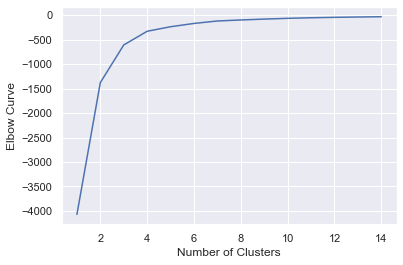

In [29]:
K_clusters = range(1,15)
kmeans = [KMeans(n_clusters = i) for i in K_clusters]
y_axis = data[['LATITUDE']]
x_axis = data[['LONGITUDE']]
score = [kmeans[i].fit(y_axis).score(y_axis) for i in range(len(kmeans))]

#visualization
plt.plot(K_clusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Elbow Curve')
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 12,init='k-means++')
kmeans.fit(data[data.columns[2:4]])
data['CLUSTER'] = kmeans.fit_predict(data[data.columns[2:4]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(data[data.columns[2:4]])
data.head(10)

,BOROUGH,NUMTIME,LONGITUDE,LATITUDE,PERSONS_AFFECTED,PEDESTRIANS_AFFECTED,CLUSTER
2,1.0,9.25,-73.870220,40.726185,0.0,0,8
3,4.0,1.15,-73.891624,40.820984,0.0,0,2
6,2.0,17.50,-73.946430,40.624382,0.0,0,9
7,1.0,8.00,-73.791720,40.679310,0.0,0,4
8,2.0,8.15,-73.899796,40.644226,0.0,0,6
13,1.0,12.42,-73.740820,40.718754,1.0,0,4
14,4.0,14.50,-73.868164,40.847130,0.0,0,7
16,1.0,9.15,-73.740800,40.660965,0.0,0,4
17,2.0,14.58,-73.975700,40.678800,0.0,0,3
18,3.0,7.70,-73.957710,40.779495,0.0,0,5


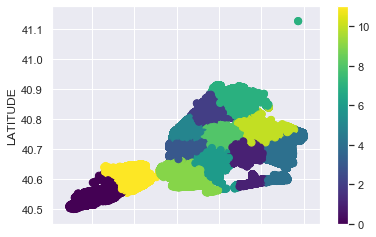

In [31]:
data.plot.scatter(x = 'LONGITUDE', y = 'LATITUDE', c=labels, s=50, cmap='viridis')
#plt.scatter(c='black', s=200, alpha=0.5)

In [39]:
import folium

In [42]:
folium_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")
marker = folium.CircleMarker(location=[40.738, -73.98])
marker.add_to(folium_map)
folium_map.save("my_map.html")

In [46]:
for index,row in data.iterrows():
    if row['BOROUGH'] ==1:
        color = '#BFD82D'
    elif row['BOROUGH'] ==2:
        color = '#FEDCD2'
    elif row['BOROUGH'] ==3:
        color = '#DF744A'
    elif row['BOROUGH'] ==4:
        color = '#DCB239'
    elif row['BOROUGH'] ==5:
        color = '#A7B3A5'
    folium.CircleMarker(location=(row['LATITUDE'],
                                  row['LONGITUDE']),
                        #radius=radius,
                        color=color,
                        fill=True).add_to(folium_map)

In [ ]:
folium_map